In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = 'data/team_stats_cleaned.csv'

try:
    df = pd.read_csv(data_path)
    print("data read successfully")
    print(df.head())
except FileNotFoundError:
    print("file could not be found")
    df = None

# quick overview of the data, ensure it's correct.
if df is not None:
    print("\n--- First 5 rows of the DataFrame ---")
    print(df.head())

    
    print("\n--- DataFrame Info ---")
    df.info()

data read successfully
   year               team  wins  losses  scoring_points_game  \
0  2016          Air Force    10       3                 35.2   
1  2016              Akron     5       7                 27.4   
2  2016            Alabama    14       1                 38.8   
3  2016  Appalachian State    10       3                 29.2   
4  2016            Arizona     3       9                 24.8   

   scoring_points_game_opp  avg_yards_per_play  avg_yards_per_play_opp  \
0                     26.2                6.02                    5.79   
1                     33.6                5.99                    6.05   
2                     13.0                6.47                    3.99   
3                     17.8                6.13                    4.99   
4                     38.3                6.08                    6.10   

   first_downs_total  first_downs_total_opp  ...  time_possession_sec_opp  \
0                302                    229  ...                


--- Generating EDA Plots ---


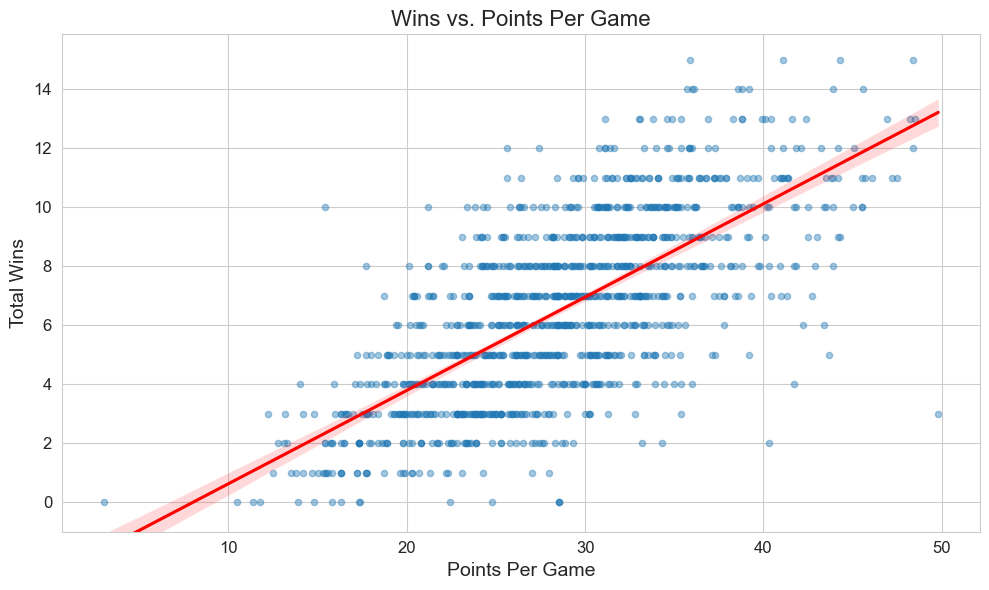

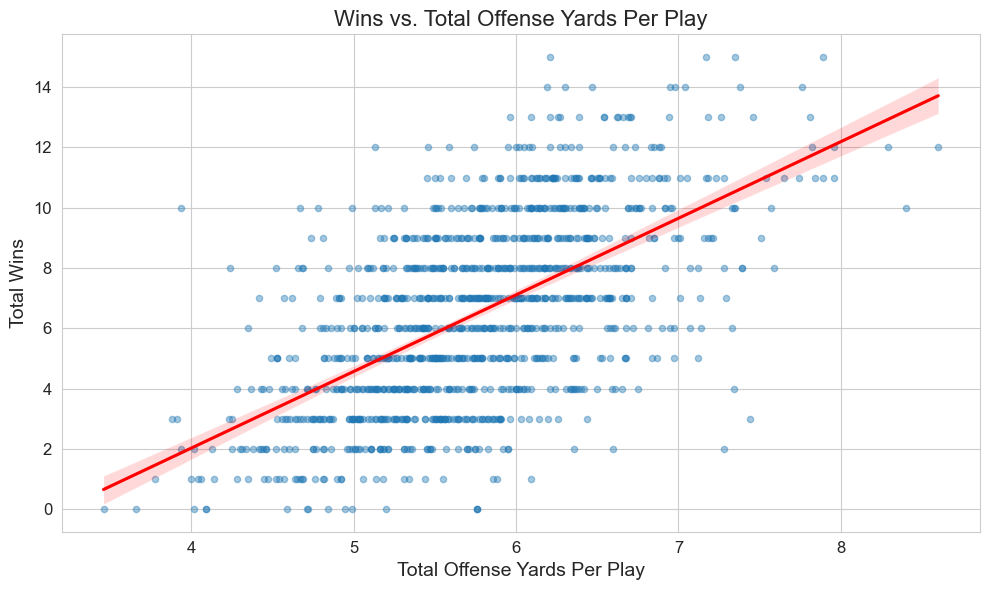

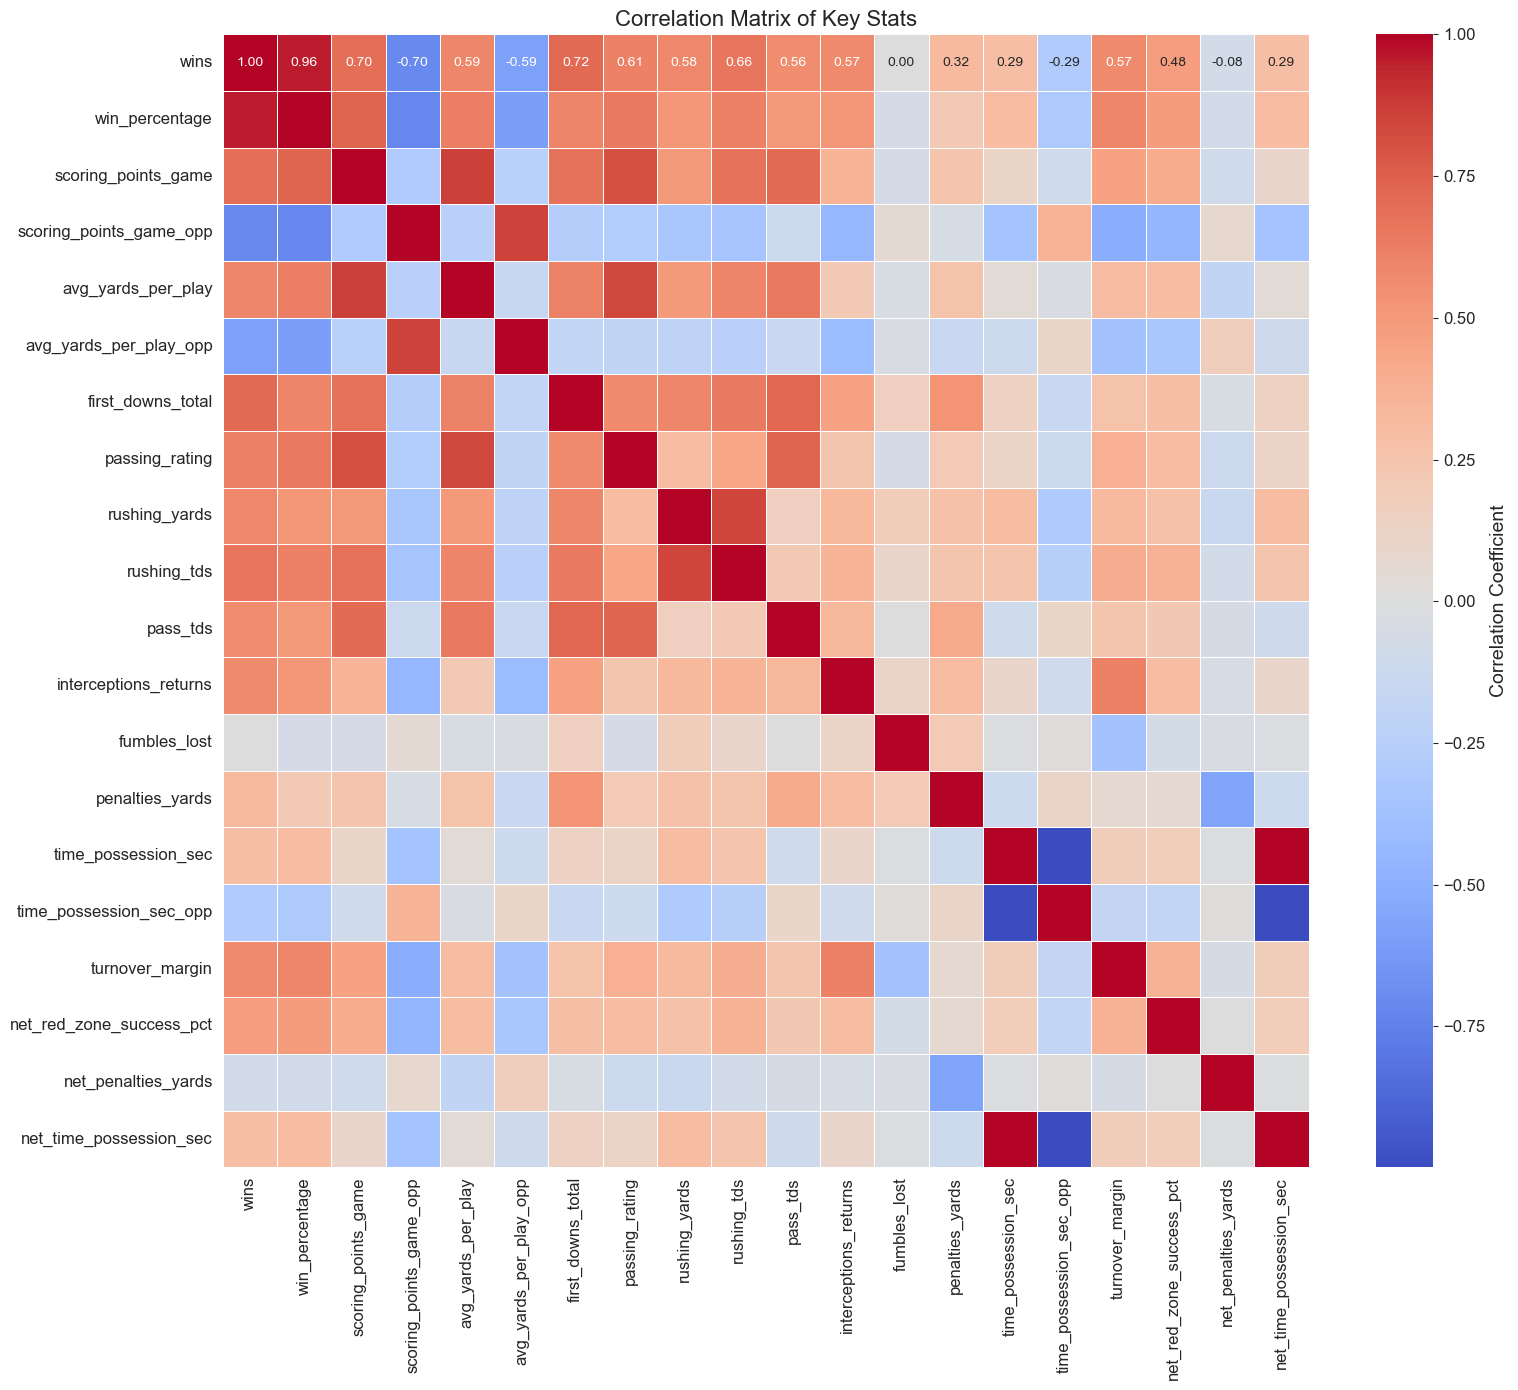

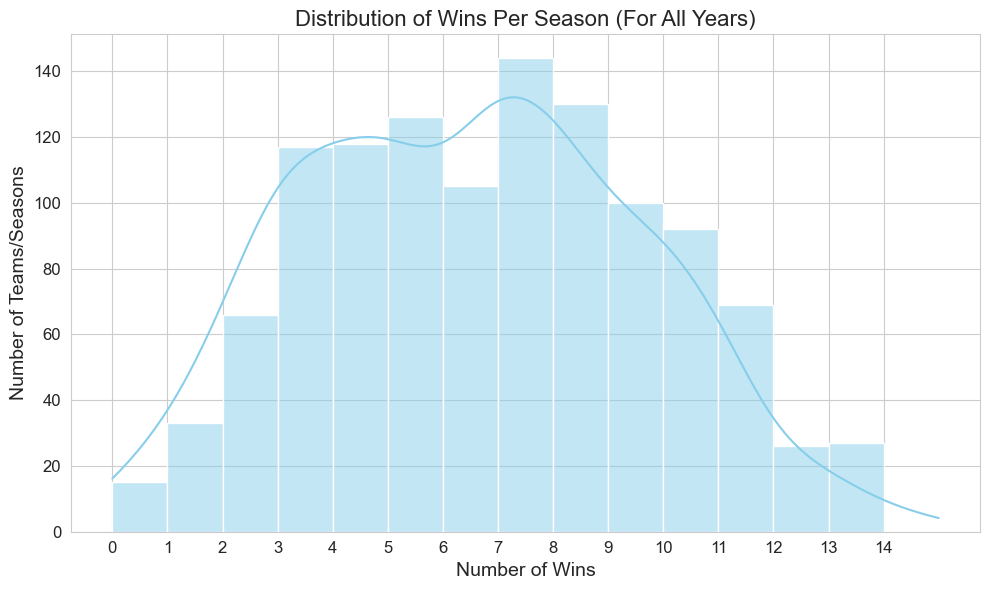

In [2]:
# plotting style
if df is not None:
    # make it look nice, we're professional here
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12

    print("\n--- Generating EDA Plots ---")

    #  Wins vs. Points Per Game (w/ regression)
    plt.figure()
    sns.regplot(x='scoring_points_game', y='wins', data=df,
            scatter_kws={'alpha':0.4, 's':20}, line_kws={'color':'red'})
    plt.title('Wins vs. Points Per Game')
    plt.xlabel('Points Per Game')
    plt.ylabel('Total Wins')
    plt.ylim(bottom=-1)
    plt.tight_layout()
    plt.show()

    # 2. Wins vs. Total Offense Yards Per Play (w/ regression)
    plt.figure()
    sns.regplot(x='avg_yards_per_play', y='wins', data=df,
            scatter_kws={'alpha':0.4, 's':20}, line_kws={'color':'red'})
    plt.title('Wins vs. Total Offense Yards Per Play')
    plt.xlabel('Total Offense Yards Per Play')
    plt.ylabel('Total Wins')
    plt.tight_layout()
    plt.show()

    # 3. Correlation Matrix (w/ heatmap)
    # stats important to the exploratory analysis
    correlation_cols = [
    'wins', 'win_percentage', 'scoring_points_game', 'scoring_points_game_opp',
    'avg_yards_per_play', 'avg_yards_per_play_opp',
    'first_downs_total', 'passing_rating', 'rushing_yards', 'rushing_tds',
    'pass_tds', 'interceptions_returns', 'fumbles_lost', 'penalties_yards',
    'redzone_efficiency', 'redzone_efficiency_opp', 'time_possession_sec',
    'time_possession_sec_opp', 'turnover_margin','net_points_game',
    'net_offense_yards_per_play','net_red_zone_success_pct','net_penalties_yards',
    'net_time_possession_sec'
]

    # only use the numeric columns (essentially all except team names)
    numeric_df_cols = df.select_dtypes(include=np.number).columns.tolist()
    existing_correlation_cols = [col for col in correlation_cols if col in numeric_df_cols]

    if existing_correlation_cols:
        plt.figure(figsize=(16, 14))
        corr_matrix = df[existing_correlation_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
                linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
        plt.title('Correlation Matrix of Key Stats')
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough columns or columns don't exist.")


    # 4. Distribution of Wins Per Season
    plt.figure()
    sns.histplot(df['wins'], bins=range(0, 15), kde=True, color='skyblue')
    plt.title('Distribution of Wins Per Season (For All Years)')
    plt.xlabel('Number of Wins')
    plt.ylabel('Number of Teams/Seasons')
    plt.xticks(range(0, 15))
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame not loaded.")

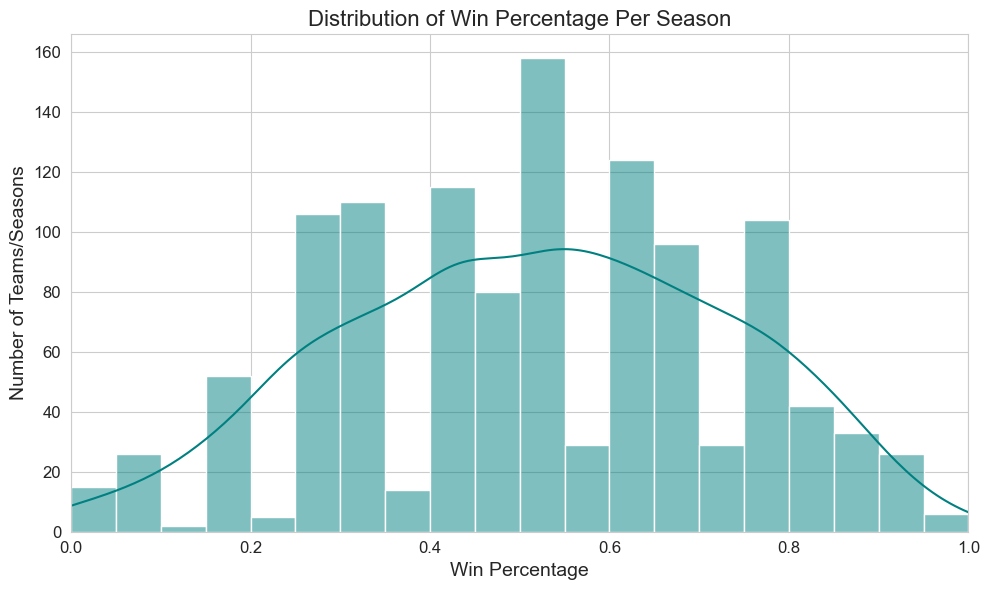

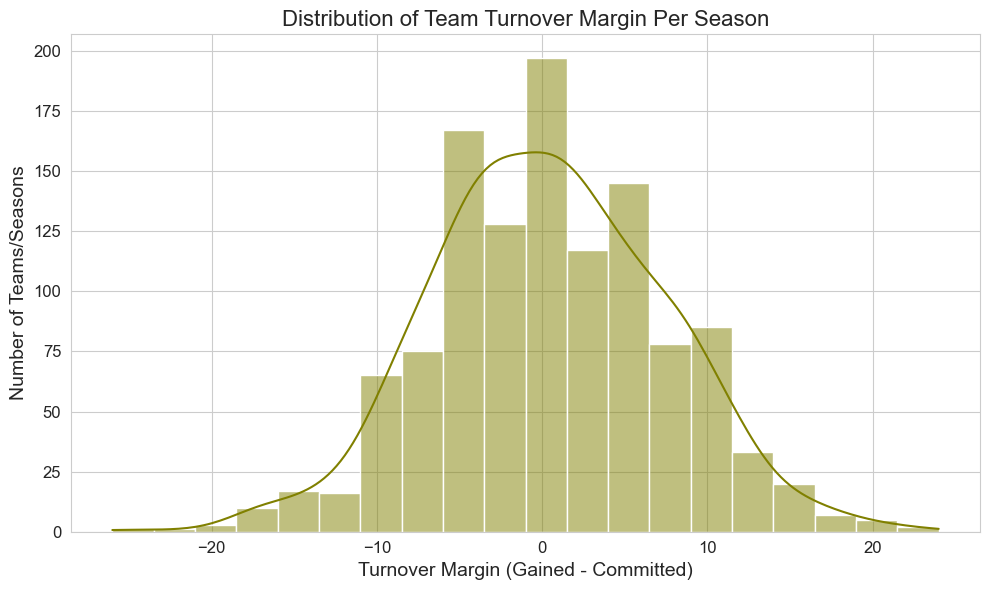

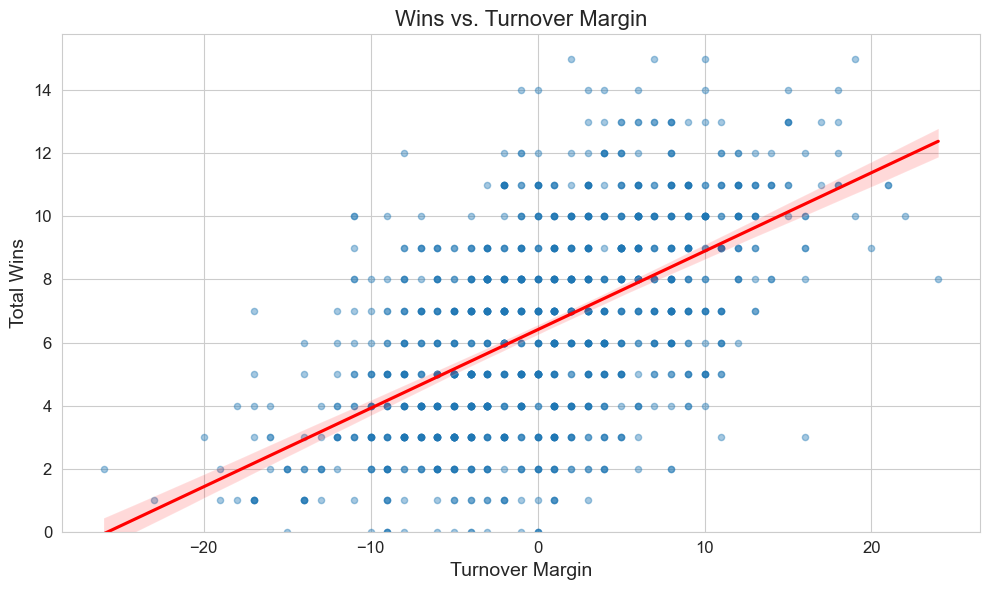

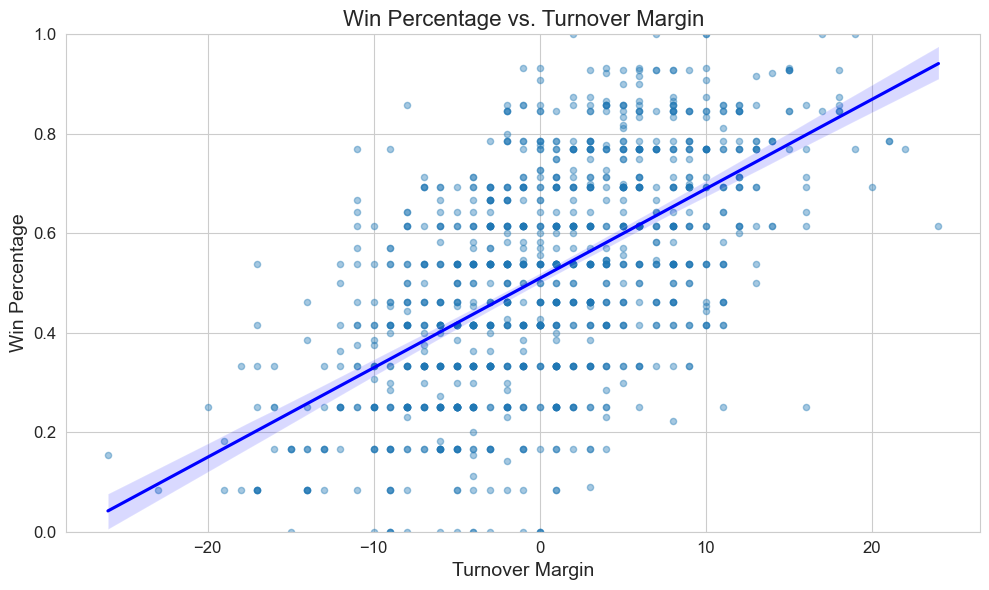

In [3]:

# 5. Distribution of Win Percentage Per Season
if 'win_percentage' in df.columns:
    plt.figure()
    sns.histplot(df['win_percentage'], bins=20, kde=True, color='teal')
    plt.title('Distribution of Win Percentage Per Season')
    plt.xlabel('Win Percentage')
    plt.ylabel('Number of Teams/Seasons')
    plt.xlim(0, 1) # Win percentage is between 0 and 1
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'win_percentage' column not found.")

# 6. Distribution of Turnover Margin
if 'turnover_margin' in df.columns:
    plt.figure()
    sns.histplot(df['turnover_margin'], bins=20, kde=True, color='olive')
    plt.title('Distribution of Team Turnover Margin Per Season')
    plt.xlabel('Turnover Margin (Gained - Committed)')
    plt.ylabel('Number of Teams/Seasons')
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'turnover_margin' column not found.")

# 7. Wins vs. Turnover Margin (w/ regression line)
if 'wins' in df.columns and 'turnover_margin' in df.columns:
    plt.figure()
    sns.regplot(x='turnover_margin', y='wins', data=df,
                scatter_kws={'alpha':0.4, 's':20},
                line_kws={'color':'red'})
    plt.ylim(bottom=0)
    plt.title('Wins vs. Turnover Margin')
    plt.xlabel('Turnover Margin')
    plt.ylabel('Total Wins')
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'wins' or 'turnover_margin' column not found.")

# 8. Win Percentage vs. Turnover Margin (w/ regression line)
if 'win_percentage' in df.columns and 'turnover_margin' in df.columns:
    plt.figure()
    sns.regplot(x='turnover_margin', y='win_percentage', data=df,
                scatter_kws={'alpha':0.4, 's':20},
                line_kws={'color':'blue'})
    # Win pct is between 0 and 1
    plt.ylim(0, 1) 
    plt.title('Win Percentage vs. Turnover Margin')
    plt.xlabel('Turnover Margin')
    plt.ylabel('Win Percentage')
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'win_percentage' or 'turnover_margin' column(s) not found.")


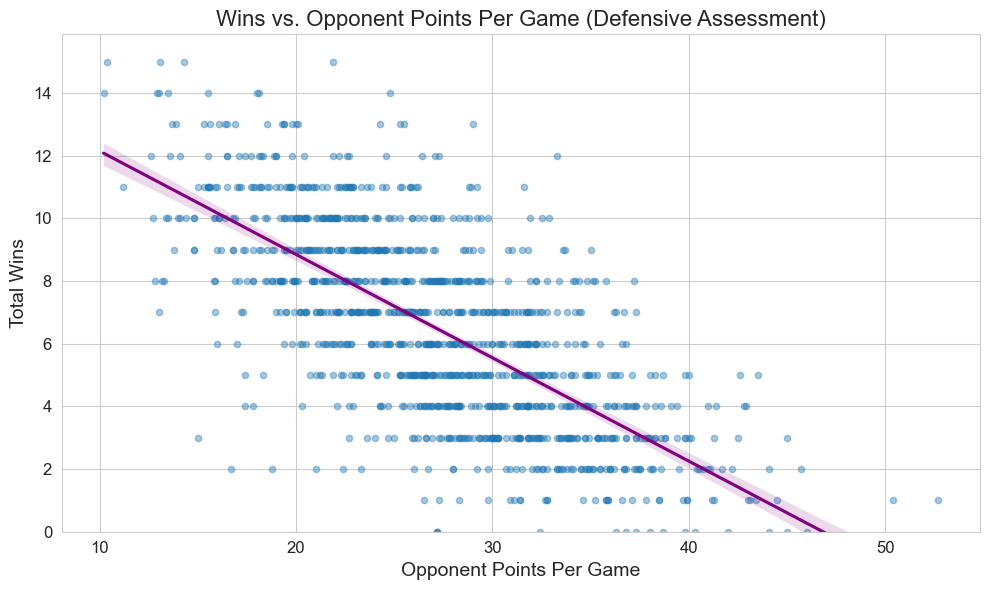

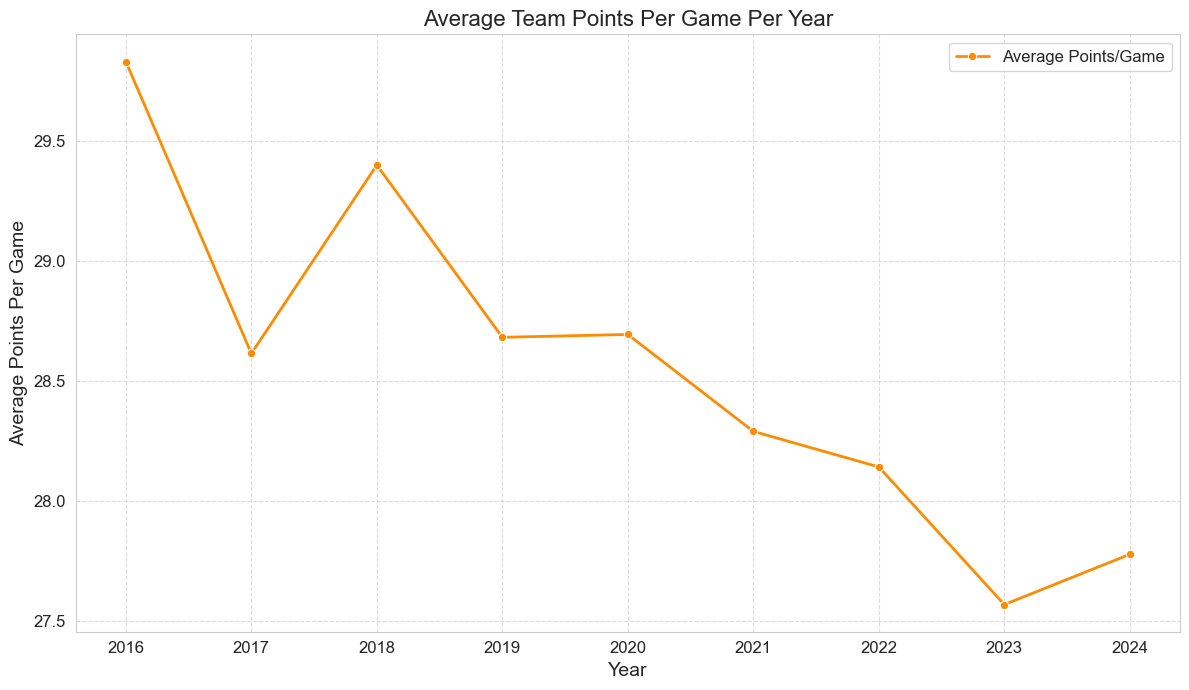

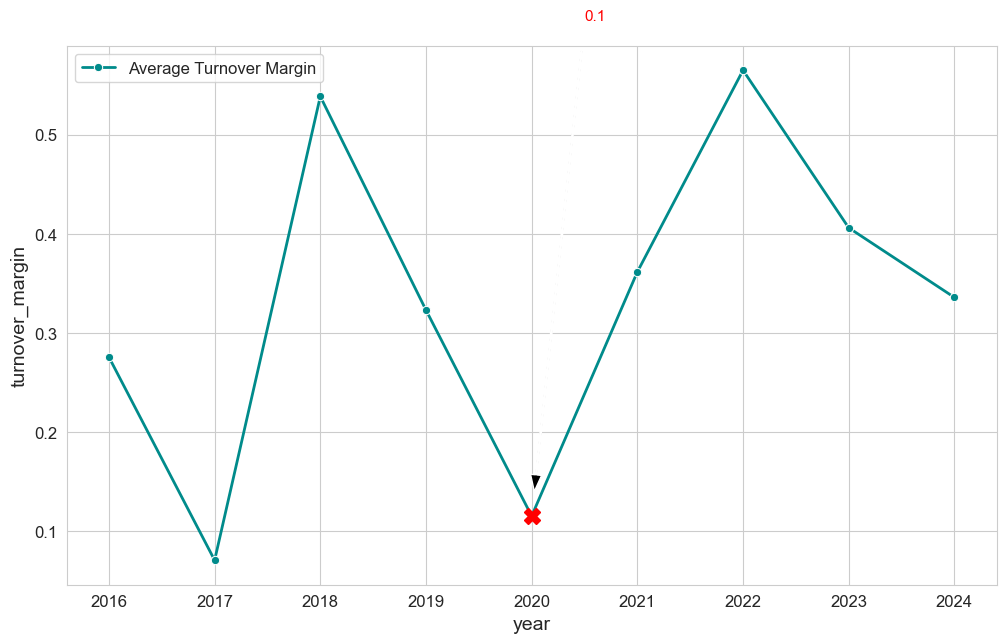

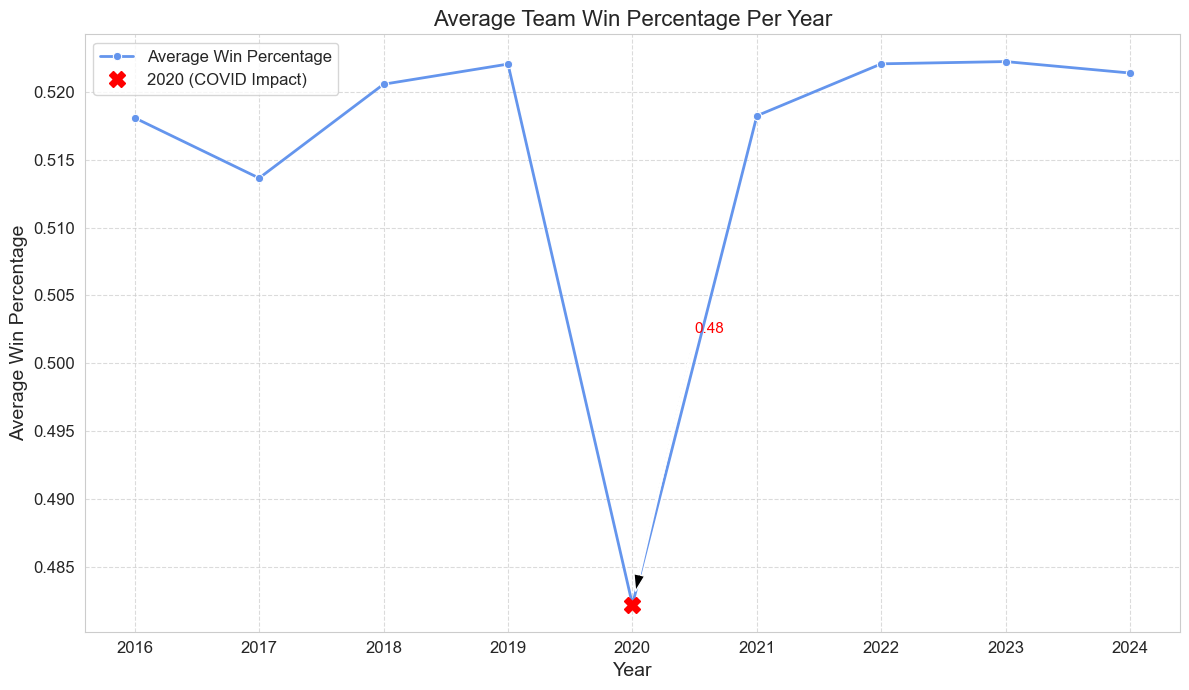

In [4]:
# 9. Wins vs. Opponent Points Per Game
if 'wins' in df.columns and 'scoring_points_game_opp' in df.columns:
    plt.figure()
    sns.regplot(x='scoring_points_game_opp', y='wins', data=df,
                scatter_kws={'alpha':0.4, 's':20},
                line_kws={'color':'purple'})
    plt.ylim(bottom=0)
    plt.title('Wins vs. Opponent Points Per Game (Defensive Assessment)')
    plt.xlabel('Opponent Points Per Game')
    plt.ylabel('Total Wins')
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'wins' or 'scoring_points_game_opp' column(s) not found.")

# 10. Average Points Per Game Per Year
plt.figure(figsize=(12, 7))
avg_points_per_year = df.groupby('year')['scoring_points_game'].mean().reset_index()
sns.lineplot(x='year', y='scoring_points_game', data=avg_points_per_year, marker='o',
             color='darkorange', linestyle='-', linewidth=2, label='Average Points/Game')

plt.title('Average Team Points Per Game Per Year')
plt.xlabel('Year')
plt.ylabel('Average Points Per Game')
plt.xticks(df['year'].unique())
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# 11. Average Turnover Margin Per Year
if 'year' in df.columns and 'turnover_margin' in df.columns:
    plt.figure(figsize=(12, 7))
    avg_tm_per_year = df.groupby('year')['turnover_margin'].mean().reset_index()
    sns.lineplot(x='year', y='turnover_margin', data=avg_tm_per_year, marker='o',
                    color='darkcyan', linestyle='-', linewidth=2, label='Average Turnover Margin')
     # COVID-19 Effect
    covid_year_tm = avg_tm_per_year[avg_tm_per_year['year'] == 2020]
    if not covid_year_tm.empty:
        plt.plot(covid_year_tm['year'], covid_year_tm['turnover_margin'],
                    marker='X', markersize=12, color='red', linestyle='None',
                    label='2020 (COVID Impact)')
        plt.annotate(f"{covid_year_tm['turnover_margin'].values[0]:.1f}",
                        xy=(covid_year_tm['year'].values[0], covid_year_tm['turnover_margin'].values[0]),
                        xytext=(covid_year_tm['year'].values[0] + 0.5,
                        covid_year_tm['turnover_margin'].values[0] + 0.5),
                        arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                        fontsize=11, color='red')

# 12. Average Win Percentage Per Year
if 'year' in df.columns and 'win_percentage' in df.columns:
    plt.figure(figsize=(12, 7))
    avg_wp_per_year = df.groupby('year')['win_percentage'].mean().reset_index()
    sns.lineplot(x='year', y='win_percentage', data=avg_wp_per_year, marker='o',
                    color='cornflowerblue', linestyle='-', linewidth=2,
                    label='Average Win Percentage')

# COVID-19 Effect
    covid_year_wp = avg_wp_per_year[avg_wp_per_year['year'] == 2020]
    if not covid_year_wp.empty:
        plt.plot(covid_year_wp['year'], covid_year_wp['win_percentage'],
                marker='X', markersize=12, color='red', linestyle='None',
                label='2020 (COVID Impact)')
        plt.annotate(f"{covid_year_wp['win_percentage'].values[0]:.2f}",
                        xy=(covid_year_wp['year'].values[0], covid_year_wp['win_percentage'].values[0]),
                        xytext=(covid_year_wp['year'].values[0] + 0.5, covid_year_wp['win_percentage'].values[0] + 0.02),
                        arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                        fontsize=11, color='red')

    plt.title('Average Team Win Percentage Per Year')
    plt.xlabel('Year')
    plt.ylabel('Average Win Percentage')
    plt.xticks(df['year'].unique())
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'year' or 'win_percentage' column not found.")


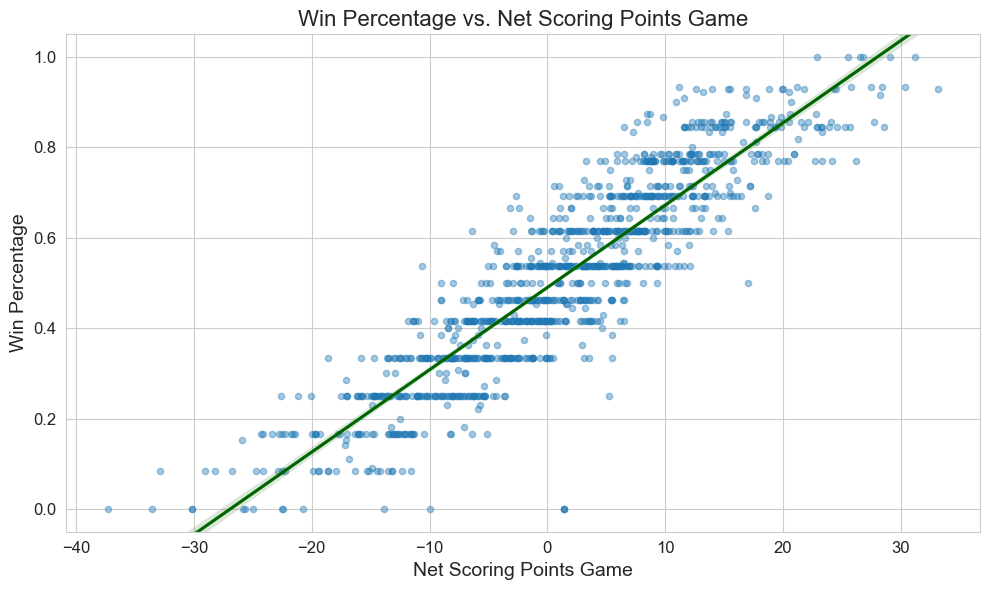

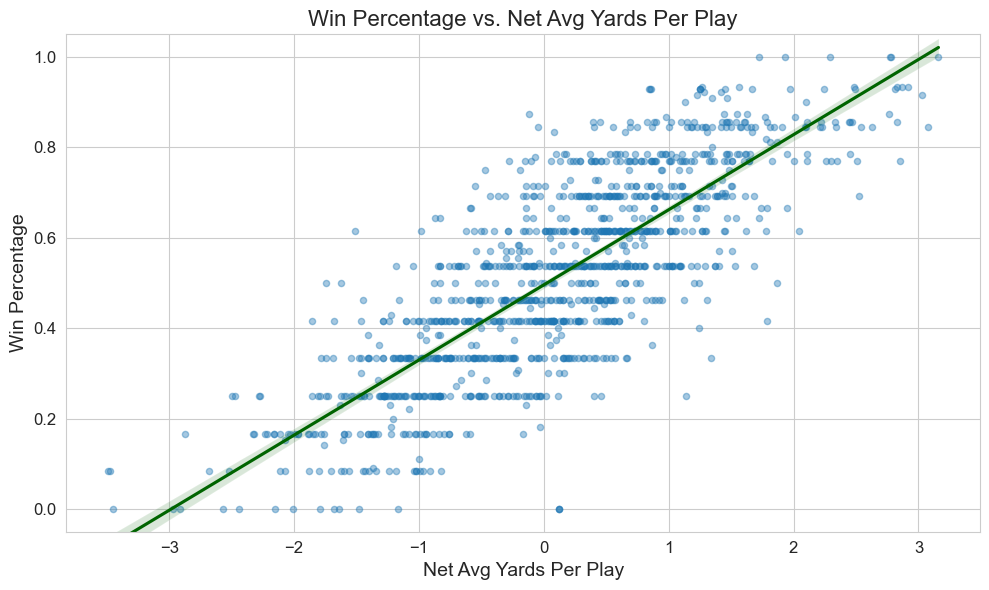

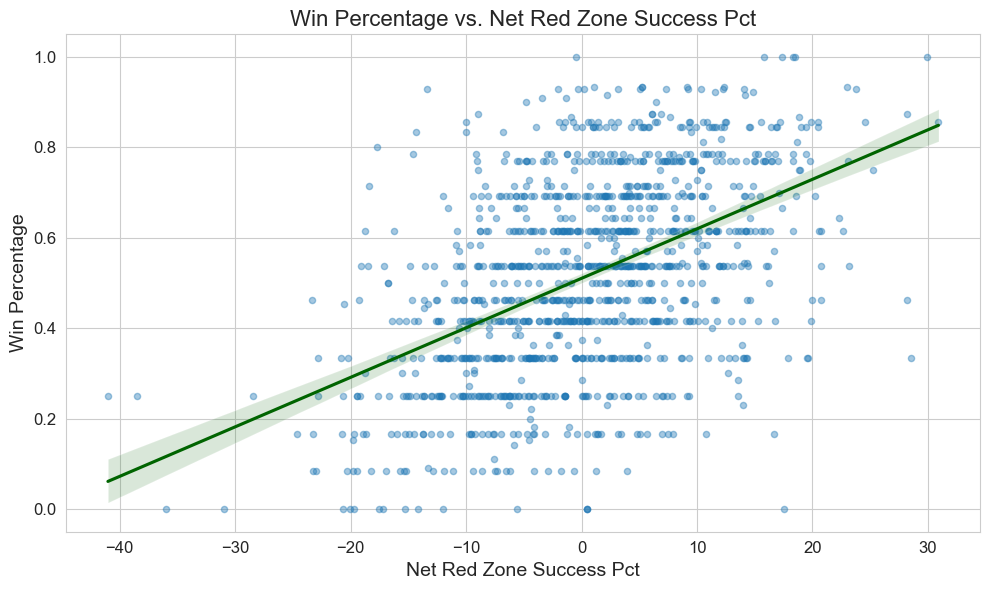

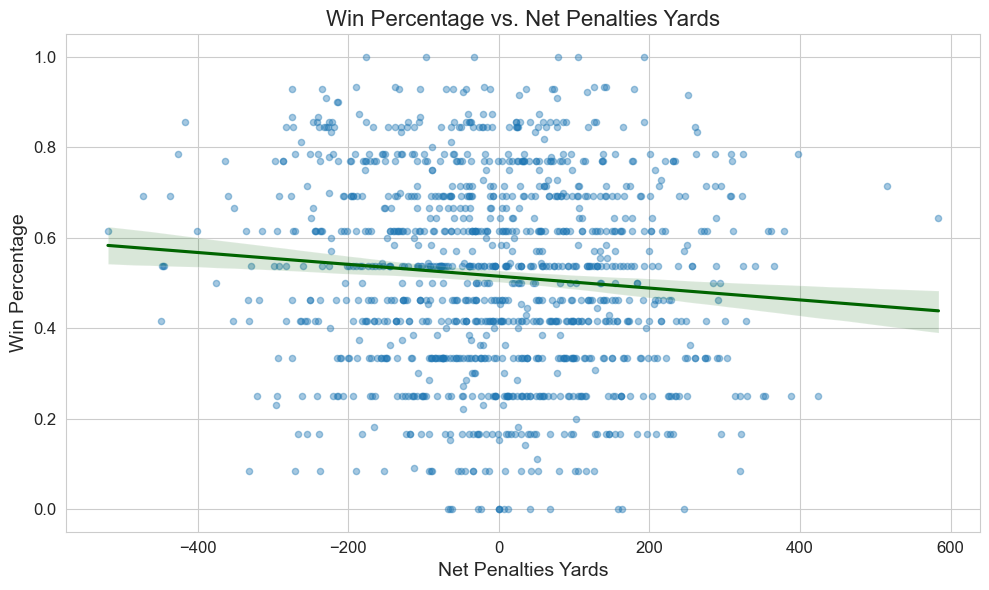

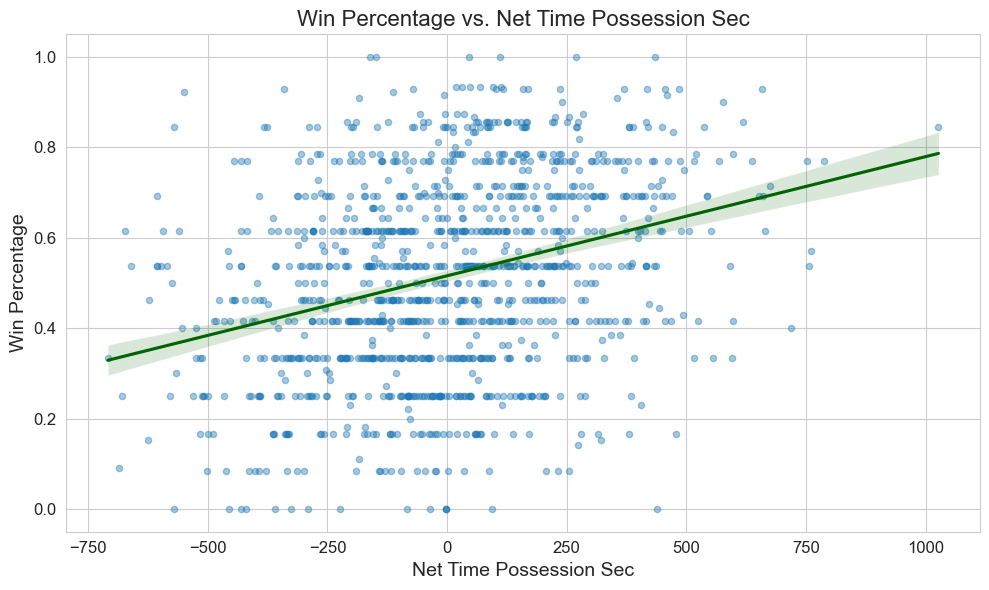

In [5]:

# 13. Win Percentage vs. Net Features (with Regression Line)

net_features = [
    'net_scoring_points_game',
    'net_avg_yards_per_play',
    'net_red_zone_success_pct',
    'net_penalties_yards',
    'net_time_possession_sec'
]
if df is not None:
    if 'win_percentage' in df.columns:
        for feature in net_features:
            if feature in df.columns:
                plt.figure(figsize=(10, 6))
                sns.regplot(x=feature, y='win_percentage', data=df,
                            scatter_kws={'alpha':0.4, 's':20},
                            line_kws={'color':'darkgreen'})
                # ensure we see all data points clearly
                plt.ylim(-0.05, 1.05)
                plt.title(f'Win Percentage vs. {feature.replace("_", " ").title()}')
                plt.xlabel(feature.replace("_", " ").title())
                plt.ylabel('Win Percentage')
                plt.tight_layout()
                plt.show()
            else:
                print(f"Warning: '{feature}' column not found for scatter plot against win percentage.")
    else:
        print("Warning: 'win_percentage' column not found, skipping scatter plots for net features.")

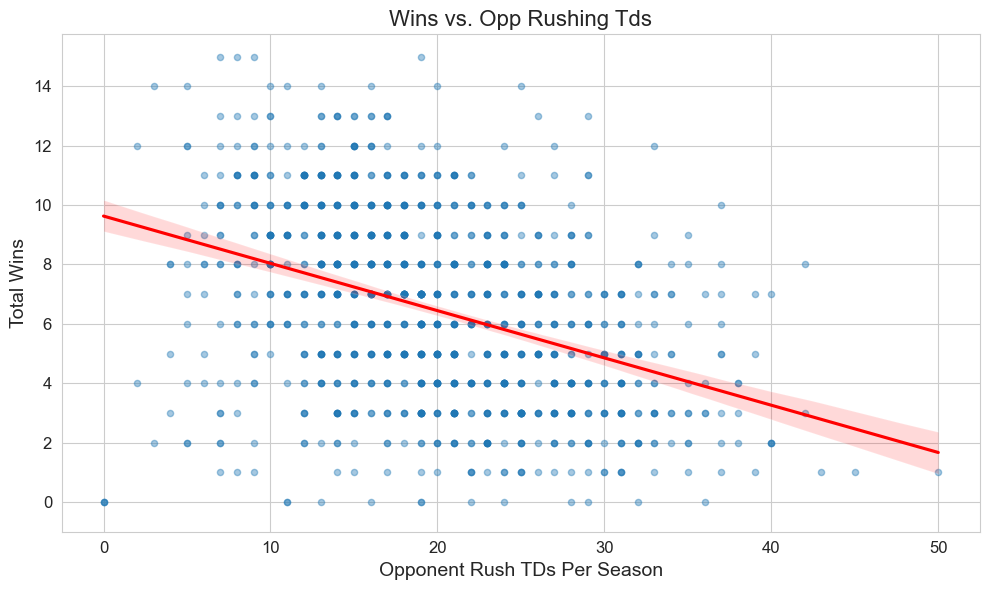

In [ ]:
#  Wins vs. Opponents Rushing TDs (w/ regression) to investigate the positive coefficient
plt.figure()
sns.regplot(x='rushing_tds_opp', y='wins', data=df,
        scatter_kws={'alpha':0.4, 's':20}, line_kws={'color':'red'})
plt.title('Wins vs. Opp Rushing Tds')
plt.xlabel('Opponent Rush TDs Per Season Per Team')
plt.ylabel('Total Wins')
plt.ylim(bottom=-1)
plt.tight_layout()
plt.show()